In [2]:
import matplotlib.pyplot as plt

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import collections
def hist(img, pixel):
    count = collections.Counter(img)
            
    return count[pixel]

In [8]:
def distance_occurence(image1, image2):
    img1 = image1
    img2 = image2
    img1_distinct_ele = img1
    img2_distinct_ele = img2
    distance = 0
    for a in img1_distinct_ele:
        hist_a_img2 = hist(img2, a)
        hist_a_img1 = hist(img1, a)
        
        if hist_a_img2 != hist_a_img1:
            distance += abs(hist_a_img2 - hist_a_img1)
        
    for b in img2_distinct_ele:    
        hist_b_img2 = hist(img2, b)
        hist_b_img1 = hist(img1, b)

        if hist_b_img1 == 0:
            distance += hist_b_img2
        
    return distance

In [11]:
print("Hist: ", distance_occurence(x_train[1].flatten(), x_train[1].flatten()))

Hist:  0


In [60]:
from sklearn import datasets
digits = datasets.load_digits()

# Fixed image
digit1 = digits.images[0]

# Crating an array of results
hist_distance = []

# Computing the hist between the source image and mnist dataset images
for i in range(10):
  hist_distance.append(distance_occurence(digit1.flatten(), digits.images[i].flatten()))


In [61]:
# printing the array
print("Array of hist distances between source image and each other image: \n", hist_distance)

Array of hist distances between source image and each other image: 
 [0, 338, 127, 110, 223, 285, 258, 140, 171, 183]


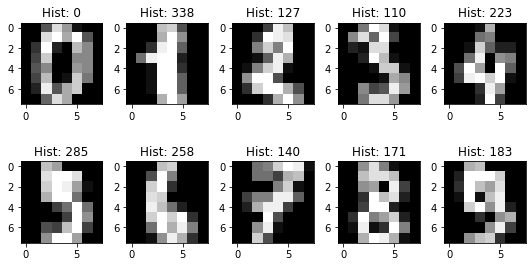

In [69]:
num_col = 5
num_row = 2
num = 10

fig, axes = plt.subplots(num_row, num_col, figsize = (1.5*num_col, 2*num_row))

for i in range(num) :
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title('Hist: {}'.format(hist_distance[i]))
plt.tight_layout()
plt.show()



Optimal hist after the image itself:  110


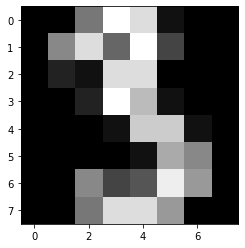

In [72]:
min = 1000
indice = 0
for i in range(num):
  if hist_distance[i] != 0 and hist_distance[i] < min:
    min = hist_distance[i]
    indice = i

print("Optimal hist after the image itself: ", min)
plt.imshow(digits.images[indice], cmap='gray')

